In [2]:
import numpy as np
import pandas as pd
import cv2
import os

In [3]:
img_label_file = "data/labels.csv"

labels_csv = pd.read_csv(img_label_file, index_col=0)
labels = labels_csv.loc["fall-01"]
label_1 = labels.loc[labels["frame"] == 1]
label_1.label

fall name
fall-01   -1
Name: label, dtype: int64

In [4]:
### Read in the data
img_data_dir = "data/imgs/" # replace with your own dir if necessary
img_label_file = "data/labels.csv"

## Given an image name, extracts the label from the labels.csv file. True if 1 False if -1
def extract_label(file_name):
    split = file_name.split("-") # split image name
    fall_name = split[0] + "-" + split[1] # reconstruct fall name
    frame = int(split[-1].split(".")[0]) # end of split is like 113.png. removes .png part
    fall_labels = labels_csv.loc[fall_name]
    frame_label = fall_labels.loc[fall_labels["frame"] == frame]
    return int(frame_label.label)

### Loads in the data from images and stores it in an array. Order is important because 
### The labels are in the same order as the images are appended to the array
def load_img_data():
    imgs = []
    labels = []
    labels_csv = pd.read_csv(img_label_file)
    
    # Iterates through fall folders and the frames within each fall
    for img_folder in os.listdir(img_data_dir):
        path = os.path.join(img_data_dir,img_folder)
        if ("fall" in path):
            for file in os.listdir(path):
                img = cv2.imread(os.path.join(path, file))
                img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
                imgs.append(img)
                labels.append([extract_label(file)])
                
    return imgs, labels

In [5]:
images, labels = load_img_data()

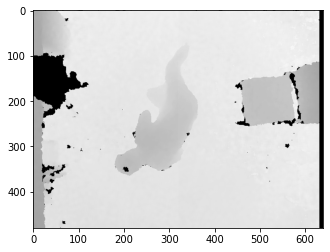

In [6]:
import matplotlib.pyplot as plt
plt.imshow(images[0])

In [7]:
from sklearn.model_selection import train_test_split
images = np.asarray(images)
labels = np.asarray(labels)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.33)


In [8]:
from keras.utils import to_categorical 

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

print(y_train.shape)

Using TensorFlow backend.


(2633, 3)


In [9]:
# starter model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(480, 640, 3)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
          


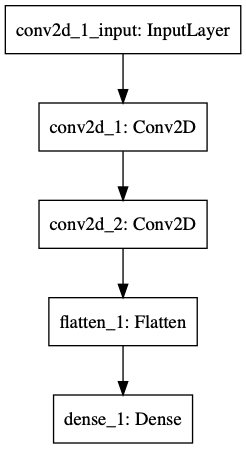

In [10]:
from keras.utils import plot_model

plot_model(model, to_file='model.png')

In [11]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#train the model
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
2633/2633 [==============================] - 790s 300ms/step - loss: 15.1072 - accuracy: 0.5097
Epoch 2/3
2633/2633 [==============================] - 775s 295ms/step - loss: 0.4664 - accuracy: 0.8416
Epoch 3/3
2633/2633 [==============================] - 766s 291ms/step - loss: 0.0446 - accuracy: 0.9905


In [13]:
model.evaluate(X_test, y_test)

1298/1298 [==============================] - 62s 47ms/step


[0.48916650902141223, 0.8382126092910767]

In [17]:
y_pred = model.predict(X_test)


In [18]:
print(y_pred, y_test)

[[5.1069469e-03 9.8744428e-01 7.4487631e-03]
 [2.4405823e-04 3.5699888e-03 9.9618596e-01]
 [3.2781367e-03 6.0486220e-02 9.3623567e-01]
 ...
 [3.9348699e-02 2.6458554e-05 9.6062481e-01]
 [9.8141339e-03 3.8593546e-02 9.5159233e-01]
 [9.3400337e-02 8.8051647e-02 8.1854802e-01]] [[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [23]:
# index 0 is intermediate, index 1 is fall, index 2 is not a fall
from sklearn.metrics import classification_report
y_pred_bool = np.argmax(y_pred, axis=1)
y_test_bool = np.argmax(y_test, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       333
           1       0.91      0.92      0.92       400
           2       0.84      0.90      0.87       565

    accuracy                           0.84      1298
   macro avg       0.83      0.82      0.82      1298
weighted avg       0.83      0.84      0.84      1298



In [31]:
from sklearn.metrics import multilabel_confusion_matrix
matrix =multilabel_confusion_matrix(y_test_bool, y_pred_bool)

array([[[890,  75],
        [120, 213]],

       [[863,  35],
        [ 32, 368]],

       [[633, 100],
        [ 58, 507]]])

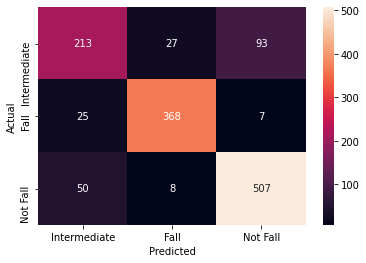

In [38]:
import seaborn as sn
data = {'y_Actual':    y_test_bool,
        'y_Predicted': y_pred_bool
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,xticklabels=['Intermediate', 'Fall', 'Not Fall'], yticklabels=['Intermediate', 'Fall', 'Not Fall'],fmt='g', annot=True)
plt.show()

In [ ]:
# starter model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(480, 640, 3)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1), padding='valid'))

model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1), padding='valid'))

model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1), padding='valid'))

model.add(Conv2D(512, kernel_size=3, activation='relu'))
model.add(Conv2D(512, kernel_size=3, activation='relu'))
model.add(Conv2D(512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1), padding='valid'))

model.add(Conv2D(512, kernel_size=3, activation='relu'))
model.add(Conv2D(512, kernel_size=3, activation='relu'))
model.add(Conv2D(512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1), padding='valid'))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(3, activation='softmax'))
          